In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 0, 'Y')

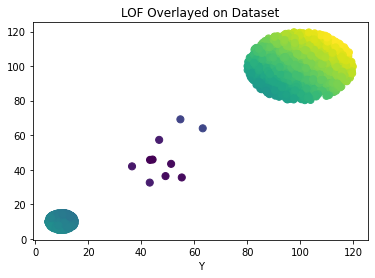

In [53]:
data = pd.read_csv('data/data.csv', names=["x","y"])
results = pd.read_csv('data/results/lof.txt/part-00000', names=["index1","LRD"])
data['index1'] = data.index
merged = pd.merge(data,results,on="index1")
del merged['index1']
merged.LRD = merged.LRD
fig = plt.scatter(merged.x,merged.y, s=50, c=merged.LRD)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.xlabel("Y")

In [52]:
merged.loc[(merged.LRD > 1.0) & (merged.y>20) & (merged.y < 70)]

,x,y,LRD
2000,54.778094,69.172358,60.920283
2001,46.769060,57.272442,49.974664
2002,63.201903,63.968678,62.186026
2003,55.297266,35.505470,45.319418
2004,43.219905,32.532189,50.123952
2005,43.330490,45.680367,43.349056
2006,36.533063,41.937020,48.548895
2007,49.164949,36.293804,45.425391
2008,51.274593,43.378843,45.154710
2009,44.288244,45.875986,42.798240


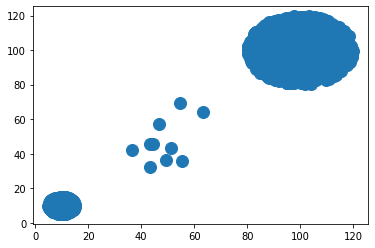

In [85]:
groups = merged1.groupby('LRD')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

In [89]:
merged

,x,y,LRD
0,9.616232,6.821204,False
1,10.757276,12.782887,False
2,10.383064,9.921313,False
3,14.721831,8.904125,False
4,14.576181,8.423416,False
...,...,...,...
2005,43.330490,45.680367,False
2006,36.533063,41.937020,False
2007,49.164949,36.293804,False
2008,51.274593,43.378843,False


In [11]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(data)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=data[LOF_pred==1]

In [25]:
data2 = data.copy()
data2['lof'] = LOF_Scores.tolist()
data2

,x,y,index1,lof
0,9.616232,6.821204,0,-1.228322
1,10.757276,12.782887,1,-1.200333
2,10.383064,9.921313,2,-1.175099
3,14.721831,8.904125,3,-1.172529
4,14.576181,8.423416,4,-1.153459
...,...,...,...,...
2005,43.330490,45.680367,2005,-2.194854
2006,36.533063,41.937020,2006,-2.338549
2007,49.164949,36.293804,2007,-2.260249
2008,51.274593,43.378843,2008,-2.144096


Text(0.5, 0, 'Y')

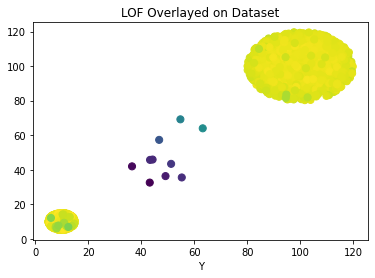

In [27]:
fig = plt.scatter(data2.x,data2.y, s=50, c=data2.lof)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.xlabel("Y")